# <center> Portfolio Analysis with FAANG Stocks <center>

This project aims to undertake an analysis about FAANG portfolio.

In [19]:
!pip install PyPortfolioOpt

  Created wheel for ecos: filename=ecos-2.0.7.post1-cp37-cp37m-win_amd64.whl size=68356 sha256=8befaa1cbb9aa09d88c2584b5ee309272a5646490b5cbc0e127a10e3bfbc60b7
  Stored in directory: c:\users\macbi\appdata\local\pip\cache\wheels\70\e7\fd\4a4f957fc18a0f0407ca4b331c51e6a469c92efec58f732edf
  Created wheel for scs: filename=scs-2.1.2-cp37-cp37m-win_amd64.whl size=119585 sha256=56c7a73454bc1a07f78d3e46ee69df69533e0006cd82da634b8e72389546aad2
  Stored in directory: c:\users\macbi\appdata\local\pip\cache\wheels\bc\e9\2d\41c52bfaefbbbee5b3c6c189e168039f6ac9b40fa2e14fe96d
Successfully built ecos scs


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_datareader import data as web

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [2]:
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [3]:
stockStartDate = '2015-01-01'
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-10-31'

In [5]:
df = pd.DataFrame()
for stock in assets :
    df[stock] = web.DataReader(stock, data_source = 'yahoo', start = stockStartDate, end = today)['Adj Close']

In [6]:
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2015-01-02,78.449997,308.519989,24.941502,49.848572,523.373108
2015-01-05,77.190002,302.190002,24.238857,47.311428,512.463013
2015-01-06,76.150002,295.290009,24.241146,46.501427,500.585632
2015-01-07,76.150002,298.420013,24.581060,46.742859,499.727997
2015-01-08,78.180000,300.459991,25.525522,47.779999,501.303680
...,...,...,...,...,...
2020-10-26,277.109985,3207.040039,115.050003,488.239990,1590.449951
2020-10-27,283.290009,3286.330078,116.599998,488.929993,1604.260010
2020-10-28,267.670013,3162.780029,111.199997,486.239990,1516.619995


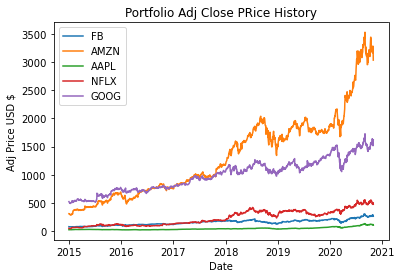

In [10]:
title = 'Portfolio Adj Close PRice History'
mystocks = df
for c in mystocks.columns.values : 
    plt.plot(mystocks[c], label = c)
plt.title(title)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Adj Price USD $', fontsize = 10)
plt.legend(mystocks.columns.values, loc = 'upper left')
plt.show()

In [11]:
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.016061,-0.020517,-0.028172,-0.050897,-0.020846
2015-01-06,-0.013473,-0.022833,0.000094,-0.017121,-0.023177
2015-01-07,0.000000,0.010600,0.014022,0.005192,-0.001713
2015-01-08,0.026658,0.006836,0.038422,0.022188,0.003153
...,...,...,...,...,...
2020-10-26,-0.026967,0.000824,0.000087,-0.000082,-0.030804
2020-10-27,0.022302,0.024724,0.013472,0.001413,0.008683
2020-10-28,-0.055138,-0.037595,-0.046312,-0.005502,-0.054630


In [12]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.101318,0.058794,0.054293,0.060001,0.057474
AMZN,0.058794,0.096357,0.050818,0.069584,0.054672
AAPL,0.054293,0.050818,0.088036,0.052189,0.048816
NFLX,0.060001,0.069584,0.052189,0.182108,0.055725
GOOG,0.057474,0.054672,0.048816,0.055725,0.073205


In [14]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
print('The variance of the portfolio is :', port_variance)

The variance of the portfolio is : 0.06663021527495858


In [15]:
port_std = np.sqrt(port_variance)
print('The Standard deviation of the portfolio is :', port_std)

The Standard deviation of the portfolio is : 0.25812829227916606


In [16]:
port_annual_return = np.sum(returns.mean() * weights * 252)
port_annual_return

0.34089657814295055

In [26]:
percent_var = str(round(port_variance, 10) * 100) + '%'
percent_vols = str(round(port_std, 10) * 100) + '%'
percent_ret = str(round(port_annual_return, 4) * 100) + '%'
print('Expected annual return : ', percent_ret)
print('Annual volatility / Risk : ', percent_vols)
print('Annual variance : ', percent_var)

Expected annual return :  34.089999999999996%
Annual volatility / Risk :  25.812829230000002%
Annual variance :  6.66302153%


In [23]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('FB', 0.0), ('AMZN', 0.79055), ('AAPL', 0.03529), ('NFLX', 0.17416), ('GOOG', 0.0)])
Expected annual return: 47.3%
Annual volatility: 29.7%
Sharpe Ratio: 1.52


(0.472538909719448, 0.2974749718287715, 1.5212671739655876)

In [27]:
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 20000)
allocation, leftover = da.lp_portfolio()
print('Discrete allocation :', allocation)
print('Funds remaining : ${:.2f}'.format(leftover))

Discrete allocation : {'AMZN': 5, 'AAPL': 7, 'NFLX': 8}
Funds remaining : $251.31
